<a href="https://colab.research.google.com/github/hiya906/my-machine-learning/blob/master/Day_4_Various_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#사용법

1. 우측 상단 '로그인'

2. 좌측 상단 '실습 모드에서 열기'

※ 각각의 셀은 셀 좌측 상단 실행 버튼을 통해 실행할 수 있습니다.

※ 실행 중 '경고: 이 노트는 Google에서 작성하지 않았습니다.'라는 창이 뜰 경우, '실행 전에 모든 런타임 재설정'란에 체크 후 '무시하고 계속하기'를 하시면 됩니다.

# 1. Decision Tree

## 와인 데이터 로드

load_wine() 으로 와인 데이터셋을 로드하여 와인의 종류를 예측해본다. 


In [0]:
from sklearn.datasets import load_wine

# 와인 데이터를 불러옵니다.
data = load_wine()

# 데이터에 대한 자세한 정보를 볼 수 있습니다.
print(data.DESCR)

# x: 독립변수(attribute)를 저장합니다.
# y: 종속변수(class)를 저장합니다.
x = data.data
y = data.target

## 트레이닝, 테스트 데이터 분리

In [0]:
import numpy as np

# Test를 해볼 인덱스를 0부터 (데이터개수-1)까지를 한번 random하게 섞는다.
test_ids = np.random.permutation(len(x))

x_train = x[test_ids[:-10]]
x_test = x[test_ids[-10:]]
 
y_train = y[test_ids[:-10]]
y_test = y[test_ids[-10:]]

## 모델 정의

In [0]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, random_state=0)

## 모델 학습 및 예측

In [0]:
model.fit(x_train, y_train)

pred = model.predict(x_test)

## 모델 평가
Evaluation metric: Accuracy (정확도)

In [0]:
from sklearn.metrics import accuracy_score

print("accuracy: %.6f" % accuracy_score(y_true=y_test, y_pred=pred))

accuracy: 0.900000


## 모델 분석: 시각화

graphviz를 사용하여 생성된 트리를 그래프로 관찰합니다.

graphviz 설치방법
- pip install graphviz

In [0]:
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(model, out_file=None, feature_names=data.feature_names)
graph = graphviz.Source(dot_data)
graph.format='png'
graph.render(filename="tree")

'tree.png'

## 실습 1. 스팸메일 판단 (20 minute practice)

데이터 파일을 왼쪽 '파일'란에 끌어서 업로드 해주세요.

스팸메일 데이터는 아래와 같습니다.
- Spam_train.csv
- Spam_test.csv


'**아래에 코드를 작성해주세요**' 칸에 코드를 작성해주시면 됩니다.

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import graphviz


def main():

    train_input = pd.read_csv("sample_data/Spam_train.csv")
    
    ####################### 아래에 코드를 작성해주세요 #######################
    
    # 0. 테스트 데이터를 불러오세요!
    
    test_input = 
    
    ##########################################################################

    print(train_input.head())

    x_train = np.array(train_input.loc[:, train_input.columns != 'spam'])
    x_test = np.array(test_input.loc[:, test_input.columns != 'spam'])
    
    y_train = np.array(train_input['spam'])
    y_test = np.array(test_input['spam'])
    
    ####################### 아래에 코드를 작성해주세요 #######################
    
    # 1. 모델 정의
     

    # 2. 모델 학습

    
    # 3. 모델 예측


    ##########################################################################
    
    print("accuracy: %.6f" % accuracy_score(y_true=y_test, y_pred=pred))
    
    

    ####################### 아래에 코드를 작성해주세요 #######################

    # 4. 모델 분석: 시각화하기
    
    dot_data =
    
    ##########################################################################
 
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render(filename='spam_tree')
    

if __name__ == "__main__":
    main()

SyntaxError: ignored

### 실습 1. 정답코드입니다

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import numpy as np
import graphviz


def main():

    train_input = pd.read_csv("sample_data/Spam_train.csv")
    test_input = pd.read_csv("sample_data/Spam_test.csv")

    print(train_input.head())

    x_train = np.array(train_input.loc[:, train_input.columns != 'spam'])
    y_train = np.array(train_input['spam'])
    x_test = np.array(test_input.loc[:, test_input.columns != 'spam'])
    y_test = np.array(test_input['spam'])

    model = DecisionTreeClassifier(random_state=0, max_leaf_nodes=50)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    print("accuracy: %.6f" % accuracy_score(y_true=y_test, y_pred=pred))

    dot_data = export_graphviz(model, out_file=None, feature_names=train_input.columns[0:57])
    graph = graphviz.Source(dot_data)
    graph.format = 'png'
    graph.render(filename="spam_tree")

if __name__ == "__main__":
    main()

FileNotFoundError: ignored

# 2. Naive Bayes Classifier

마찬가지로, 아래와 같은 순서로 진행됩니다.

1. 데이터 로드
2. 모델 정의
3. 모델 학습
4. 모델 예측
5. 모델 평가
6. 모델 분석

## 와인 데이터 로드

load_wine() 으로 와인 데이터셋을 로드하여 와인의 종류를 예측해본다. 

In [0]:
from sklearn.datasets import load_wine

# 와인 데이터를 불러옵니다.
data = load_wine()

# 데이터에 대한 자세한 정보를 볼 수 있습니다.
print(data.DESCR)

# x: 독립변수(attribute)를 저장합니다.
# y: 종속변수(class)를 저장합니다.
x = data.data
y = data.target

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## 트레이닝, 테스트 데이터 분리

In [0]:
import numpy as np

# Test를 해볼 인덱스를 0부터 (데이터개수-1)까지를 한번 random하게 섞는다.
test_ids = np.random.permutation(len(x))

x_train = x[test_ids[:-10]]
x_test = x[test_ids[-10:]]
 
y_train = y[test_ids[:-10]]
y_test = y[test_ids[-10:]]

## 모델 정의

In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

model = GaussianNB()
#model = MultinomialNB()
#model = BernoulliNB()

## 모델 학습 및 예측

In [0]:
model.fit(x_train, y_train)

pred = model.predict(x_test)

## 모델 평가
- Evaluation Metric: Accuracy (정확도)

In [0]:
from sklearn.metrics import accuracy_score

print("accuracy: %.6f" % accuracy_score(y_true=y_test, y_pred=pred))

accuracy: 1.000000


## 모델 분석: 확률 예측값 출력

In [0]:
print(model.predict_proba(x_test[0].reshape(1,-1)))

[[4.67135926e-28 2.48052995e-06 9.99997519e-01]]


## 실습 2. 문장의 긍/부정 판단 (15 minute practice)

데이터 파일을 왼쪽 '파일'란에 끌어서 업로드 해주세요.

스팸메일 데이터는 아래와 같습니다.
- SentimentSentence_train.csv
- SentimentSentence_test.csv


'**아래에 코드를 작성해주세요**' 칸에 코드를 작성해주시면 됩니다.

In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np


def main():

    ####################### 아래에 코드를 작성해주세요 #######################

    # 0. 훈련 데이터, 테스트 데이터를 불러오세요!

    train_input = 
       
    test_input = 
    
    print(train_input.head())

    
    # 1. 'sentence'인 train_input, test_input 데이터들을 array로 변환하여 각각 x_train_input, x_test_input에 저장하세요
    # 힌트: 위의 Decision Tree 코드를 참고하시면 됩니다!
    x_train_input = 
    x_test_input = 
    
    # 2. 'label'인 train_input, test_input 데이터들을 array로 변환하여 각각 y_train, y_test에 저장하세요
    y_train = 
    y_test = 
    
    ##########################################################################

    tfidf = TfidfVectorizer()
    tfidf.fit(x_train_input)

    x_train = tfidf.transform(x_train_input).toarray()
    x_test = tfidf.transform(x_test_input).toarray()
    
    ####################### 아래에 코드를 작성해주세요 #######################
    
    # 1. 모델 정의
     

    # 2. 모델 학습

    
    # 3. 모델 예측


    ##########################################################################
    
    print("accuracy: %.6f" % accuracy_score(y_true=y_test, y_pred=pred))
    
   

if __name__ == "__main__":
    main()

### 실습 2. 정답코드입니다

In [0]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np


def main():

    train_input = pd.read_csv("sample_data/SentimentSentence_train.csv")
    test_input = pd.read_csv("sample_data/SentimentSentence_test.csv")

    print(train_input.head())

    x_train_input = np.array(train_input['sentence'])
    y_train = np.array(train_input['label'])
    x_test_input = np.array(test_input['sentence'])
    y_test = np.array(test_input['label'])

    tfidf = TfidfVectorizer()
    tfidf.fit(x_train_input)

    x_train = tfidf.transform(x_train_input).toarray()
    x_test = tfidf.transform(x_test_input).toarray()

    #model = GaussianNB()
    #model = MultinomialNB()
    model = BernoulliNB()

    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    print("%.6f" % accuracy_score(y_true=y_test, y_pred=pred))

if __name__ == "__main__":
    main()

                                            sentence  label
0  level 5 spicy was perfect  where spice didn't ...      1
1  they also now serve indian naan bread with hum...      1
2  it kept getting worse and worse so now i'm off...      0
3  not a single employee came out to see if we we...      0
4  never been to hard rock casino before  will ne...      0
0.815000


# 3. K-Nearest Neighbor

## 붓꽃 데이터 로드

load_iris() 으로 붓꽃 데이터셋을 로드하여 붓꽃의 종류를 예측해본다. 

In [0]:
from sklearn.datasets import load_iris

data = load_iris()

x = data.data
y = data.target

## 트레이닝, 테스트 분리

이번에는 직접 지정해주는 것이 아닌, sklearn에서 제공하는 train_test_split 함수를 사용하여 데이터를 분리합니다.

In [0]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## 모델 정의

In [0]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

##모델 학습 및 예측

In [0]:
model.fit(x_train, y_train)  # 모델 학습

pred = model.predict(x_test) # 모델 예측

##모델 평가

In [0]:
from sklearn.metrics import accuracy_score

print("accuracy: %.6f" % accuracy_score(y_true=y_test, y_pred=pred))

accuracy: 0.966667


##모델 분석: 어느 K가 제일 좋을까?

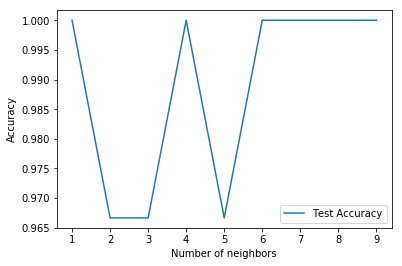

In [0]:
import numpy as np
import matplotlib.pyplot as plt

neighbors = np.arange(1, 10)
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    model = KNeighborsClassifier(n_neighbors=k)  # 모델 정의
    model.fit(x_train, y_train)  # 모델 학습
    pred = model.predict(x_test)

    test_accuracy[i] = accuracy_score(y_test, pred)

plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

## 실습 3. 비만 여부 판단 (15 min practice)

데이터 파일을 왼쪽 '파일'란에 끌어서 업로드 해주세요.

스팸메일 데이터는 아래와 같습니다.
- diabetes_train.csv
- diabetes_test.csv


'**아래에 코드를 작성해주세요**' 칸에 코드를 작성해주시면 됩니다.

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


def main():
  
    diabetes_data = pd.read_csv('sample_data/diabetes.csv')

    print(diabetes_data.head())
    
    x = diabetes_data.drop(columns=['Outcome'])
    y = diabetes_data['Outcome'].values

    ####################### 아래에 코드를 작성해주세요 #######################

    # 1. 훈련 데이터, 테스트 데이터를 불러오세요! (train:test = 4: 1)
    x_train, x_test, y_train, y_test = 
    
    
    ##########################################################################
   
    
    neighbors = np.arange(1, 50)
    test_accuracy = np.empty(len(neighbors)) 
    
    for i , k in enumerate(neighbors):
      
        ####################### 아래에 코드를 작성해주세요 #######################
    
        # 1. 모델 정의
     

        # 2. 모델 학습

    
        # 3. 모델 예측


        ##########################################################################
        
        test_accuracy[i] = accuracy_score(y_test, pred)

              
    plt.plot(neighbors, test_accuracy, label='Test Accuracy')
    plt.legend()
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.show()

if __name__ == "__main__":
    main() 

###실습 3. 정답코드입니다

   Pregnancies  Glucose  BloodPressure  ...  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72  ...                     0.627   50        1
1            1       85             66  ...                     0.351   31        0
2            8      183             64  ...                     0.672   32        1
3            1       89             66  ...                     0.167   21        0
4            0      137             40  ...                     2.288   33        1

[5 rows x 9 columns]


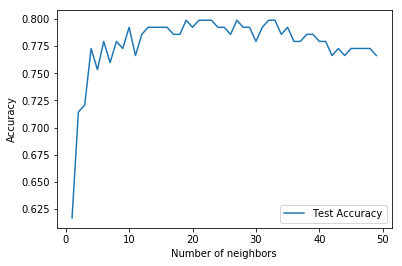

In [0]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import numpy as np


def main():
  

    diabetes_data = pd.read_csv('sample_data/diabetes.csv')
    
    print(diabetes_data.head())
    
    x = diabetes_data.drop(columns=['Outcome'])
    y = diabetes_data['Outcome'].values

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    neighbors = np.arange(1, 50)
    test_accuracy = np.empty(len(neighbors)) 
    
    for i , k in enumerate(neighbors):
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(x_train, y_train)
        pred = model.predict(x_test)
        
        test_accuracy[i] = accuracy_score(y_test, pred)

              
    plt.plot(neighbors, test_accuracy, label='Test Accuracy')
    plt.legend()
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy')
    plt.show()

if __name__ == "__main__":
    main()

# 4. 실습 응용 

정확도 (Accuracy) 뿐만이 아니라, Precision, recall, F1-score도 계산하는 법에 대해서 실습합니다!

- average = **None**: 각 클래스별 평가방법 점수
- average = '**macro**': 평가방법의 평균 점수

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.datasets import load_wine
from sklearn.tree import DecisionTreeClassifier
import numpy as np


def main():
    data = load_wine()
    x = data.data
    y = data.target

    test_ids = np.random.permutation(len(x))
    x_train = x[test_ids[:-10]]
    x_test = x[test_ids[-10:]]

    y_train = y[test_ids[:-10]]
    y_test = y[test_ids[-10:]]

    model = DecisionTreeClassifier(max_depth=10, max_leaf_nodes=50, random_state=0)

    model.fit(x_train, y_train)
    pred = model.predict(x_test)

    print("accuracy: %.6f" % accuracy_score(y_true=y_test, y_pred=pred))
    print("precision:", precision_score(y_true=y_test, y_pred=pred, average=None), precision_score(y_true=y_test, y_pred=pred, average='macro'))
    print("recall:", recall_score(y_true=y_test, y_pred=pred, average=None), recall_score(y_true=y_test, y_pred=pred, average='macro'))
    print("f1-score:", f1_score(y_true=y_test, y_pred=pred, average=None), f1_score(y_true=y_test, y_pred=pred, average='macro'))

if __name__ == "__main__":
    main()

accuracy: 0.900000
precision: [1.         0.83333333 1.        ] 0.9444444444444445
recall: [1.         1.         0.66666667] 0.8888888888888888
f1-score: [1.         0.90909091 0.8       ] 0.903030303030303


## 실습 4. 모델 비교 및 평가 (25 min practice)

데이터 파일을 왼쪽 '파일'란에 끌어서 업로드 해주세요.

3개의 데이터
- Spam_train.csv
- Spam_test.csv
- SentimentSentence_train.csv
- SentimentSentence_test.csv
- diabetes.csv


아래 칸에 **처음부터 코드를 작성 (From scratch)**해주시면 됩니다.
지금까지 배운 내용을 총 복습할 수 있습니다.

In [0]:
# From scratch
# 힌트: 

### 실습 4. 정답코드입니다

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np


def main():
  
    # 1. 데이터 로드
    
    # 스팸 데이터
    train_input = pd.read_csv("sample_data/Spam_train.csv")
    test_input = pd.read_csv("sample_data/Spam_test.csv")

    print(train_input.head())

    x_train = np.array(train_input.loc[:, train_input.columns != 'spam'])
    y_train = np.array(train_input['spam'])
    x_test = np.array(test_input.loc[:, test_input.columns != 'spam'])
    y_test = np.array(test_input['spam'])
    

#     # 문장 긍부정
#     train_input = pd.read_csv("sample_data/SentimentSentence_train.csv")
#     test_input = pd.read_csv("sample_data/SentimentSentence_test.csv")

#     x_train_input = np.array(train_input['sentence'])
#     y_train = np.array(train_input['label'])
#     x_test_input = np.array(test_input['sentence'])
#     y_test = np.array(test_input['label'])

#     tfidf = TfidfVectorizer()
#     tfidf.fit(x_train_input)

#     x_train = tfidf.transform(x_train_input).toarray()
#     x_test = tfidf.transform(x_test_input).toarray()
    
    
    
#     # 비만여부 데이터
#     diabetes_data = pd.read_csv('sample_data/diabetes.csv')    
#     x = diabetes_data.drop(columns=['Outcome'])
#     y = diabetes_data['Outcome'].values

#     x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
    
    
    # 2. 모델 정의
    classifiers = [
        DecisionTreeClassifier(),
        GaussianNB(),
        KNeighborsClassifier(5)
        
    ]  
    
    for model in classifiers:

      
        # 3. 모델 학습
        model.fit(x_train, y_train)
        
        # 4. 모델 예측
        pred = model.predict(x_test)
        
        print(model)
        print('\n')
        
        # 5. 모델 평가
        print("accuracy: %.6f" % accuracy_score(y_true=y_test, y_pred=pred))
        print("precision:", precision_score(y_true=y_test, y_pred=pred, average='macro'))
        print("recall:", recall_score(y_true=y_test, y_pred=pred, average='macro'))
        print("f1-score:", f1_score(y_true=y_test, y_pred=pred, average='macro'))
        print('\n')


if __name__ == "__main__":
    main()

   word_freq_make  word_freq_address  ...  capital_run_length_total  spam
0             0.0               0.00  ...                       617     1
1             0.0               0.00  ...                        37     0
2             0.0               0.00  ...                         2     0
3             0.0               0.19  ...                       472     0
4             0.0               0.00  ...                       149     1

[5 rows x 58 columns]
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


accuracy: 0.917301
precision: 0.9125642007679542
recall: 0.915518520350131
f1-score: 0.9139640305493963


GaussianNB(priors=No

# 5. Excercise 1. 타이타닉 생존 여부 분류

데이터 파일을 왼쪽 '파일'란에 끌어서 업로드 해주세요.

타이타닉 생존 데이터는 아래와 같습니다.
- survived_train.csv
- survived_test.csv


제출 포맷에 맞게 csv파일을 작성하여 '**Submit Predictions**' 칸에 업로드하시면 됩니다.

링크: https://www.kaggle.com/c/titanic/submit


In [0]:
# You can do everything!

# 6. Exercise 실습 2. 식용 버섯 분류

데이터 파일을 왼쪽 '파일'란에 끌어서 업로드 해주세요.

데이터는 아래와 같습니다.
- mushrooms.csv

**교차검증(Fold = 10)을 사용하여 각 모델 별 평균 정확도를 구해보세요!**

In [0]:
# You can do everything!